<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/06-Data%20Preprocessing/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/titanic.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [11]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=105)

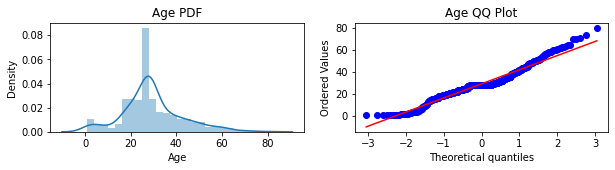

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

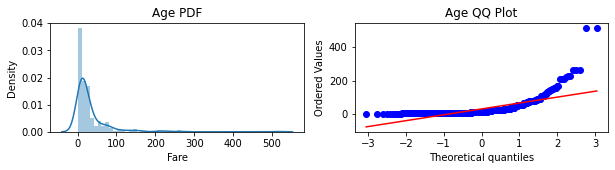

In [14]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

In [15]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [16]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.6644067796610169
Accuracy DT 0.6305084745762712


In [17]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)
lr = LogisticRegression()
dt= DecisionTreeClassifier()
lr.fit(X_train_transformed,y_train)
dt.fit(X_train_transformed,y_train)
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.6474576271186441
Accuracy DT 0.6372881355932203


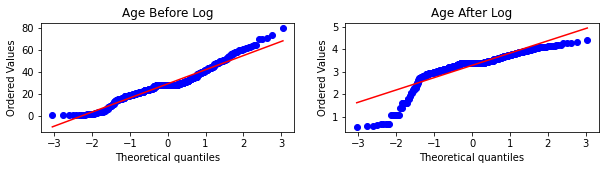

In [18]:
plt.figure(figsize=(10,2))
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')
plt.show()

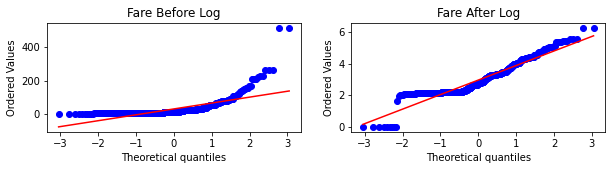

In [19]:
plt.figure(figsize=(10,2))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')
plt.show()